In [1]:
# import necessary libraries
import pandas as pd
import numpy as np

In [2]:
# read dataset
df = pd.read_csv(r"C:\Users\Rengarajan\My_Projects\DiseasePrognosis\artifacts\data_ingestion\Disease_pred_dataset\data.csv")
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [3]:
# independent & dependent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [4]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Make predictions on the test set using the best model
y_pred = clf.predict(X_test)

In [7]:
# Calculate accuracy on the test set
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 1.0


In [8]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred,zero_division=1)
print(cm)
print(report)

[[23  0  0 ...  0  0  0]
 [ 0 31  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0 21  0]
 [ 0  0  0 ...  0  0 29]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        23
                                   AIDS       1.00      1.00      1.00        31
                                   Acne       1.00      1.00      1.00        23
                    Alcoholic hepatitis       1.00      1.00      1.00        23
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        32
                   Cervical spondylosis       1.00      1.00      1.00        26
                            Chicken pox       1.00      1.00      1.00        28
                    Chronic chole

In [9]:
# predictions on the first element
pred_first_element = clf.predict(X_test.iloc[[0]])
print(pred_first_element)

['Fungal infection']


In [10]:
# predictions on the second element
pred_second_element = clf.predict(X_test.iloc[[1]])
print(pred_second_element)

['Osteoarthristis']


In [11]:
# predictions on the user data
pred_user_data = clf.predict([[1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
print(pred_user_data)

['Fungal infection']


C:\Users\Rengarajan\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [12]:
# predictions on the user data
pred_user_data = clf.predict([[0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
print(pred_user_data)

['Allergy']


C:\Users\Rengarajan\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [13]:
# predictions on the user data
pred_user_data = clf.predict([[0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
print(pred_user_data)

['Allergy']


C:\Users\Rengarajan\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [14]:
import warnings

# Filter out the UserWarning about feature names
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [15]:
# predictions on the user data
pred_user_data = clf.predict([[0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0]])[0]
print(pred_user_data)

Psoriasis


In [17]:
# Get feature importances
importances = clf.feature_importances_

# Get the indices of features sorted by importance
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    feature_index = indices[f]
    feature_name = X_train.columns[feature_index]  # Assuming X_train is a pandas DataFrame
    print(f"{f + 1}. Feature '{feature_name}' ({importances[feature_index]})")

Feature ranking:
1. Feature 'muscle_pain' (0.02082782922897304)
2. Feature 'dark_urine' (0.015728259434611497)
3. Feature 'fatigue' (0.015414633808320923)
4. Feature 'chest_pain' (0.015199863359488896)
5. Feature 'itching' (0.015153536217762114)
6. Feature 'lack_of_concentration' (0.01507639588616027)
7. Feature 'yellowing_of_eyes' (0.014317576287931314)
8. Feature 'internal_itching' (0.014241741655627702)
9. Feature 'unsteadiness' (0.014104227383856562)
10. Feature 'nausea' (0.013970676818580876)
11. Feature 'altered_sensorium' (0.013514543200820217)
12. Feature 'mild_fever' (0.013504344593291855)
13. Feature 'headache' (0.013442918727504978)
14. Feature 'loss_of_appetite' (0.01315952807921805)
15. Feature 'joint_pain' (0.013105826351803624)
16. Feature 'vomiting' (0.013032116519537786)
17. Feature 'stomach_pain' (0.012824358919474478)
18. Feature 'family_history' (0.0125131275693212)
19. Feature 'abdominal_pain' (0.012498436524287195)
20. Feature 'high_fever' (0.012100426144522294)
2

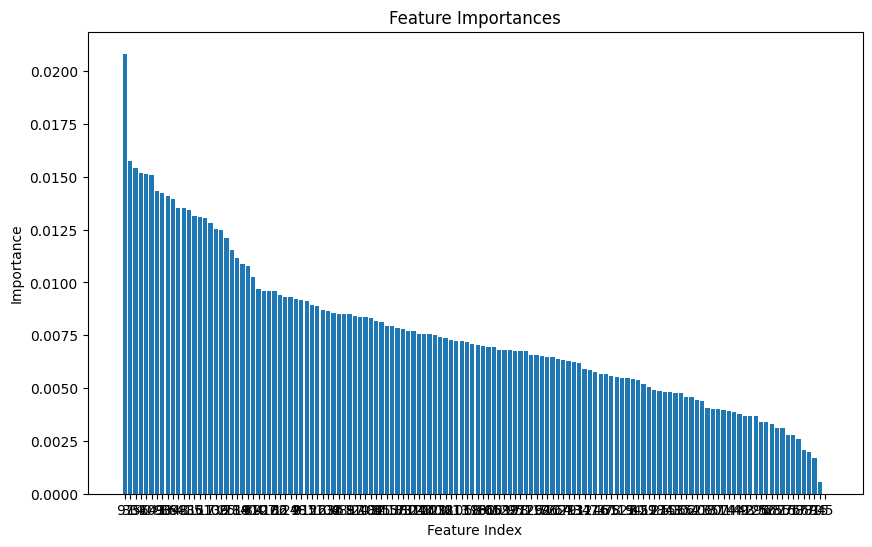

In [18]:
# You can also plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()